MODUL V

PERBAIKAN KUALITAS CITRA

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fungsi diatas merupakan fungsi untuk memanggil library yang sudah ada dalam python,
cv2 library python yang berfungsi untuk membaca, menampilkan, dan menyimpan gambar,
matplotlib library python yang berfungsi untuk memvisualisasikan data,
numpy library python yang berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array multidimensi.

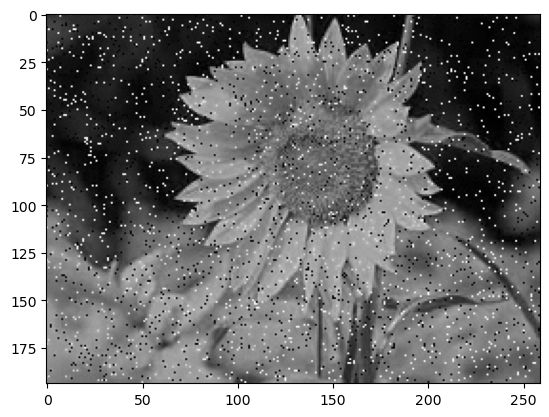

In [109]:
img = plt.imread("sunf_2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


pada fungsi diatas merupakan fungsi untuk memanggil atau mengimport gambar dengan fungsi plt kemudian mengubah atau konversi warna gambar yang awalnya RGB menjadi GRAY dengan fungsi yang sudah disediakan oleh library cv2, kemudian menampilkan gambar tersebut dengan fungsi yang sudah disediakan oleh library matplotlib.

In [110]:
def padding(image, t, l):
    pad = np.zeros((image.shape[0]+2*t, image.shape[1]+2*l))
    pad[t:-t, l:-l] = image
    return pad

pada code diatas merupakan fungsi untuk melakukan padding secara manual sehingga tidak menggunakan fungsi padding yang tersedia di library

In [111]:
def sort(array):
    n = len(array)
    
    for i in range(n):
        for j in range(n-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    
    return array

fungsi diatas merupakan fungsi untuk melakukan sort pada array secara manual sehingga tidak akan menggunakan fungsi sort yang telah disediakan pada library numpy

1. Lakukan perbaikan citra pada gambar sunf_2.jpg dengan menggunakan window/kernel 3x3, 5x5 dan 7x7 dengan menerapkan proses filtering :

A. MEAN

In [112]:
def mean(image, t, l):
    result = np.zeros(image.shape)
    padded = padding(image, t, l)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            total_sum = 0
            
            for k in range(i, i+t):
                for m in range(j, j+l):
                    total_sum += padded[k+t, m+l]
            result[i, j] = total_sum / (t * l)

    return result

pada code diatas merupakan fungsi mean yang berguna untuk melakukan perbaikan kualitas citra dengan menggunakan filtering mean . langkah kerja filter mean adalah dengan mencari nilai rata-rata dari setiap piksel yang ada disekitarnya kemudian menggantikannya dengan nilai tersebut pada piksel yang telah dipilih, dan lakukan secara berulang hingga prosesnya terhenti.

In [113]:
mean1 = mean(gray, 3, 3)
mean2 = mean(gray, 5, 5)
mean3 = mean(gray, 7, 7)

pada fungsi diatas merupakan fungsi untuk memanggil fungsi mean yang telah dibuat diatas. dengan menggunakan kernel 3x3 , 5x5, dan 7x7 sehingga akan menghasilkan gambar seperti dibawah ini

(<AxesSubplot:title={'center':'MEAN FILTERING 7x7'}>,
 Text(0.5, 1.0, 'MEAN FILTERING 7x7'),
 <matplotlib.image.AxesImage at 0x22acdfe2850>)

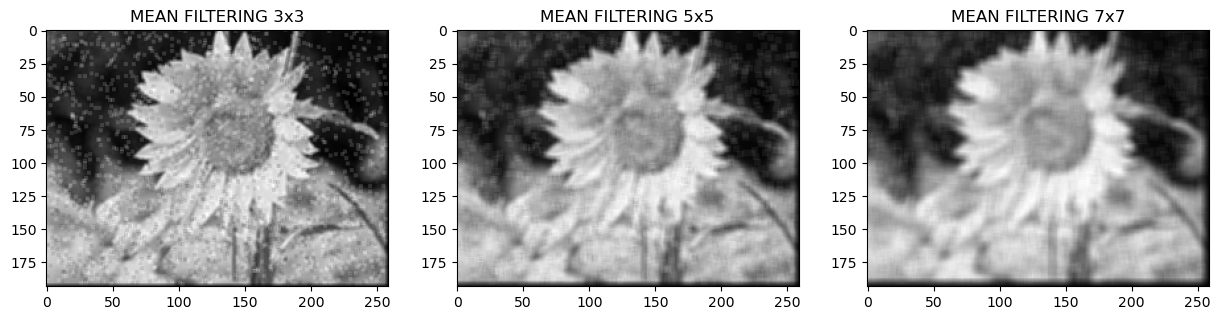

In [114]:
plt.figure(facecolor='white', figsize=[15, 15])
plt.subplot(131), plt.title('MEAN FILTERING 3x3'), plt.imshow(mean1, 'gray')
plt.subplot(132), plt.title('MEAN FILTERING 5x5'), plt.imshow(mean2, 'gray')
plt.subplot(133) ,plt.title('MEAN FILTERING 7x7'), plt.imshow(mean3, 'gray')

code diatas merupakan untuk menampilkan gambar dari ketiga gambar yang telah dilakukan filter mean dengan kernel 3x3 5x5 dan 7x7 sehingga terlihat perbedaan dalam filter mean dengan kernel yang berbeda. jika kernel yang digunakan pada gambar semakin besar maka semakin jelas hasil dari filtering mean tersebut dan jika semakin kecil kernel yang digunakan maka semakin mendekati gambar aslinya.

B. MODUS

In [169]:
def Modus(array):
    temp = np.zeros(int(np.max(array))+1)
    for i in array:
        temp[int(i)]+=1
    max = np.max(temp)
    for i in range(len(temp)):
        if(max == temp[i]): 
            return i

pada fungsi diatas merupakan fungsi untuk mencari nilai yang paling banyak muncul atau modus pada setiap piksel yang ada pada gambar yang diseleksi. dengan cara membuat array kosong dengan ukuran nilai maksimum array ditambah dengan satu kemudian melakukan perulangan untuk mencari nilai piksel yang paling sering muncul kemudian mengembalikan nilai tersebut. 

In [179]:
def modFilt(image, t, l):
    result = np.zeros(image.shape)
    pad = padding(image, t, l)
    for i in range(t, image.shape[0] + t):
        for j in range(l, image.shape[1] + l):
            temp = pad[i - t:i + t + 1, j - l:j + l + 1]
            temp_list = []
            for row in temp:
                for val in row:
                    temp_list += [val]
            temp = sort(temp_list)
            result[i - t, j - l] = Modus(temp)
    return result

pada fungsi ini merupakan fungsi untuk modus filter yang akan digunakan filtering pada citra. pada modus filter ini akan dicari nilai yang paling sering muncul dari piksel yang akan diseleksi kemudian menggantikan nilai tersebut pada nilai piksel yang pilih. proses ini akan terus berjalan hingga semua piksel pada gambar sudah selesai difiltering dengan filter modus. dengan penampakan code seperti diatas yaitu dengan membuat array kosong yang seukuran dengan gambar kemudian melakukan padding lalu melakukan filtering modus dengan mencari nilai yang paling sering muncul dari piksel-piksel yang berada pada seritar yang diseleksi tersebut.

In [181]:
mod1 = modFilt(gray, 3,3)
mod2 = modFilt(gray, 5,5)
mod3 = modFilt(gray, 7,7)

pada fungsi diatas merupakan fungsi untuk memanggil filtering modus yang telah buat sebelumnya dan dengan 3 parameter yaitu gambar dan ukuran dari kernel tersebut. pada code tersebut terdapat 3 ukuran yaitu 3x3 5x5 dan 7x7

(<AxesSubplot:title={'center':'MODUS FILTERING 7x7'}>,
 Text(0.5, 1.0, 'MODUS FILTERING 7x7'),
 <matplotlib.image.AxesImage at 0x22ad1ead190>)

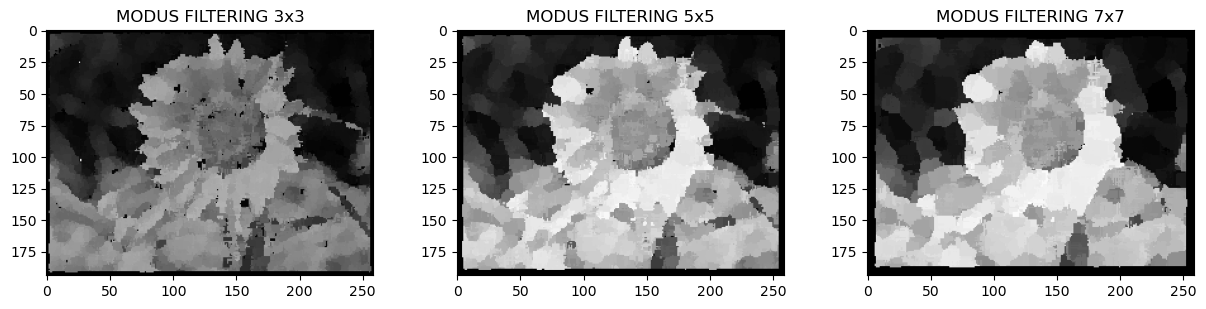

In [182]:
plt.figure(facecolor='white', figsize=[15, 7])
plt.subplot(231), plt.title('MODUS FILTERING 3x3'), plt.imshow(mod1, 'gray')
plt.subplot(232), plt.title('MODUS FILTERING 5x5'), plt.imshow(mod2, 'gray')
plt.subplot(233), plt.title('MODUS FILTERING 7x7'), plt.imshow(mod3, 'gray')


code diatas merupakan untuk menampilkan gambar dari ketiga gambar yang telah dilakukan filter modus dengan kernel 3x3 5x5 dan 7x7 sehingga terlihat perbedaan dalam filter modus dengan kernel yang berbeda. jika kernel yang digunakan pada gambar semakin besar maka semakin jelas hasil dari filtering modus tersebut dan jika semakin kecil kernel yang digunakan maka semakin mendekati gambar aslinya.

C. MEDIAN

In [156]:
def medFilt(image, t, l):
    result = np.zeros(image.shape)
    pad = padding(image, t, l)
    for i in range(t, image.shape[0] + t):
        for j in range(l, image.shape[1] + l):
            temp = pad[i - t:i + t + 1, j - l:j + l + 1]
            temp_list = []
            for row in temp:
                for val in row:
                    temp_list += [val]
            temp = sort(temp_list)
            result[i - t, j - l] = temp[int(len(temp) / 2)]
    return result


pada fungsi ini merupakan fungsi untuk median filter yang akan digunakan filtering pada citra. pada median filter ini akan dicari nilai tengah dari piksel yang akan diseleksi kemudian menggantikan nilai tersebut pada nilai piksel yang pilih. proses ini akan terus berjalan hingga semua piksel pada gambar sudah selesai difiltering dengan filter median. dengan penampakan code seperti diatas yaitu dengan membuat array kosong yang seukuran dengan gambar kemudian melakukan padding lalu melakukan filtering median dengan mencari nilai tengah piksel.

In [158]:
med1 = medFilt(gray, 3,3)
med2 = medFilt(gray, 5,5)
med3 = medFilt(gray, 7,7)

pada fungsi diatas merupakan fungsi untuk memanggil filtering median yang telah buat sebelumnya dan dengan 3 parameter yaitu gambar dan ukuran dari kernel tersebut. pada code tersebut terdapat 3 ukuran yaitu 3x3 5x5 dan 7x7

(<AxesSubplot:title={'center':'MEDIAN FILTERING 7x7'}>,
 Text(0.5, 1.0, 'MEDIAN FILTERING 7x7'),
 <matplotlib.image.AxesImage at 0x22ad1848d00>)

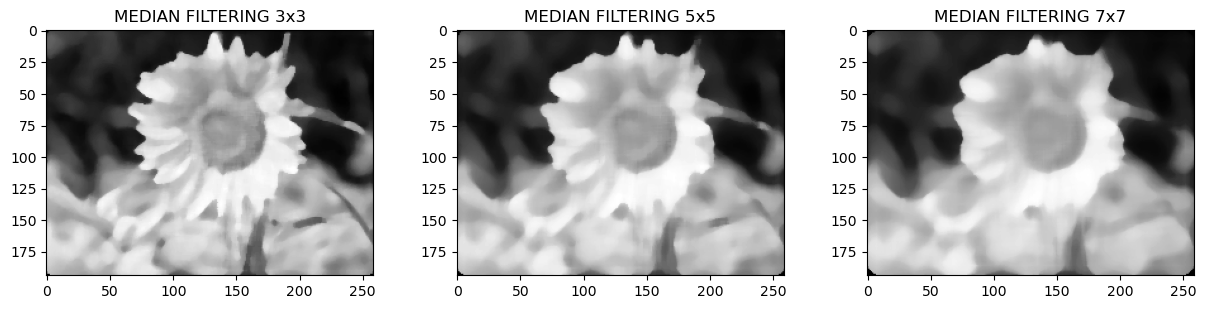

In [160]:
plt.figure(facecolor='white', figsize=[15, 7])
plt.subplot(231), plt.title('MEDIAN FILTERING 3x3'), plt.imshow(med1, 'gray')
plt.subplot(232), plt.title('MEDIAN FILTERING 5x5'), plt.imshow(med2, 'gray')
plt.subplot(233), plt.title('MEDIAN FILTERING 7x7'), plt.imshow(med3, 'gray')


code diatas merupakan untuk menampilkan gambar dari ketiga gambar yang telah dilakukan filter median dengan kernel 3x3 5x5 dan 7x7 sehingga terlihat perbedaan dalam filter median dengan kernel yang berbeda. jika kernel yang digunakan pada gambar semakin besar maka semakin jelas hasil dari filtering median tersebut dan jika semakin kecil kernel yang digunakan maka semakin mendekati gambar aslinya.